## Load the Data

In [1]:
# Specify the path to your directory in your Google Drive that contains the files
data_dir = '/content/drive/MyDrive/gbm_tcga_pub2013'

# List all the files in the directory
!ls $data_dir

case_lists
data_clinical_patient.txt
data_clinical_sample.txt
data_cna_hg19.seg
data_cna.txt
data_linear_cna.txt
data_mrna_seq_v2_rsem.txt
data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt
data_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt
data_mutations.txt
data_rppa.txt
data_rppa_zscores.txt
LICENSE
meta_clinical_patient.txt
meta_clinical_sample.txt
meta_cna_hg19_seg.txt
meta_cna.txt
meta_linear_cna.txt
meta_mrna_seq_v2_rsem.txt
meta_mrna_seq_v2_rsem_zscores_ref_all_samples.txt
meta_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt
meta_mutations.txt
meta_rppa.txt
meta_rppa_zscores.txt
meta_study.txt


In [2]:
import pandas as pd

gene_expression = pd.read_csv(f"{data_dir}/data_mrna_seq_v2_rsem.txt", sep="\t", index_col=0)

copy_number = pd.read_csv(f"{data_dir}/data_cna.txt", sep="\t", index_col=0)

mutations = pd.read_csv(f"{data_dir}/data_mutations.txt", sep="\t", index_col=0)

clinical = pd.read_csv(f"{data_dir}/data_clinical_patient.txt", sep="\t", index_col=0, skiprows=4)


<ipython-input-2-8d5943e21b2e>:7: DtypeWarning: Columns (56,60,62,151,178,186,190,192,278) have mixed types. Specify dtype option on import or set low_memory=False.
  mutations = pd.read_csv(f"{data_dir}/data_mutations.txt", sep="\t", index_col=0)


## 1.

Describe your cancer and your pathway:
Using the CDC website, research the number of people who develop this cancer in the USA and other relevant information
Describe how your pathway can impact cancer



Glioblastoma is an aggresive form of cancer that originates in the brain. The incidence rate of glioblastoma is 3.21 in 100,000 individuals. Average age of diagnosis is 64. The survival rate past one year is 40% while survival rate past two years is just 17%

The IDH1 pathway is involved in a reaction in the citric acid cycle which is crucial for callular metabolism. This process could be involved in cancer because energy production is very important for cancerous tumors to be able to grow and develop. By increasing a cells ability to produce energy, it may be able to grow more and replicate more.

## 2.

Describe your cohort: what are the observations and what variables are there for each observation?  Include specific numbers for each.


My cohort contain tumor data from 577 individuals with glioblastoma. So 577 observations total.

There are several variables for the observations, however all data was not collected for each observation

I will be using a combination of gene expression data, copy number data, mutation data, as well as clinical data.

The gene expression data contains expression data for 20,531 genes across 153 tumor samples.

The Mutation data contains mutation information in 16,325 genes.

The copy number data contains information for 24,174 genes across 524 samples

The clinical data contains important clinical information variables such as pateint age and sex. From the clinical data, I will be using months of survival post diagnosis in this project

## 3.

Analyze the mutations of genes in your pathway: First, use the source to make a list of the genes in the pathway. You don't need intimate knowledge of the pathway to start with, just the genes in it.


A. Make a figure (such as from cBioPortal) summarizing the mutations.


In [3]:
# Make a list of genes in pathway
genes_in_pathway = ['IDH1', 'IDH2', 'NPM1', 'PLOD1', 'PLOD2', 'TET2', 'KDM1A', 'KDM1B', 'KDM2A', 'KDM2B', 'KDM3A', 'KDM3B', 'KDM4A', 'KDM4B']
# filter copy number data for genes in pathway
copy_number_filtered = copy_number[copy_number.index.isin(genes_in_pathway)]
copy_number_filtered

,Entrez_Gene_Id,Cytoband,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,...,TCGA-76-4931-01,TCGA-76-4934-01,TCGA-76-4935-01,TCGA-76-6191-01,TCGA-76-6192-01,TCGA-76-6193-01,TCGA-76-6282-01,TCGA-76-6285-01,TCGA-81-5910-01,TCGA-87-5896-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
PLOD1,5351.0,1p36.22,1,0,0,0,0,0,0,0,...,-1,1,0,0,0,0,0,0,-1,2
KDM1A,23028.0,1p36.12,1,0,0,0,0,0,0,2,...,-1,1,0,-1,0,0,0,0,-1,-1
KDM4A,9682.0,1p34.1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
KDM3A,55818.0,2p11.2,1,0,0,0,0,-1,0,0,...,0,-1,0,0,0,0,0,0,0,0
IDH1,3417.0,2q34,1,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
PLOD2,5352.0,3q24,1,0,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
TET2,54790.0,4q24,0,0,-1,0,0,-1,0,0,...,0,-1,0,0,0,0,0,-1,0,0
KDM3B,51780.0,5q31.2,0,0,0,0,0,-1,-1,0,...,0,1,0,0,0,0,0,0,0,0
NPM1,4869.0,5q35.1,0,0,0,0,0,-1,-1,0,...,0,-1,0,0,0,0,0,0,0,0


In [4]:
# Calculate the total amplifications and make a column
copy_number_filtered['Total_Amplifications'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row > 0].sum(), axis=1)

# Calculate the total deletions (sum of negative values) for each row and make a column
copy_number_filtered['Total_Deletions'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row < 0].sum(), axis=1).abs()

copy_number_filtered

<ipython-input-4-a281cce5839f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_number_filtered['Total_Amplifications'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row > 0].sum(), axis=1)
<ipython-input-4-a281cce5839f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_number_filtered['Total_Deletions'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row < 0].sum(), axis=1).abs()


,Entrez_Gene_Id,Cytoband,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,...,TCGA-76-4935-01,TCGA-76-6191-01,TCGA-76-6192-01,TCGA-76-6193-01,TCGA-76-6282-01,TCGA-76-6285-01,TCGA-81-5910-01,TCGA-87-5896-01,Total_Amplifications,Total_Deletions
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
PLOD1,5351.0,1p36.22,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,2,83,61
KDM1A,23028.0,1p36.12,1,0,0,0,0,0,0,2,...,0,-1,0,0,0,0,-1,-1,74,51
KDM4A,9682.0,1p34.1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,78,18
KDM3A,55818.0,2p11.2,1,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,31,33
IDH1,3417.0,2q34,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,37
PLOD2,5352.0,3q24,1,0,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,64,47
TET2,54790.0,4q24,0,0,-1,0,0,-1,0,0,...,0,0,0,0,0,-1,0,0,24,59
KDM3B,51780.0,5q31.2,0,0,0,0,0,-1,-1,0,...,0,0,0,0,0,0,0,0,38,46
NPM1,4869.0,5q35.1,0,0,0,0,0,-1,-1,0,...,0,0,0,0,0,0,0,0,41,52


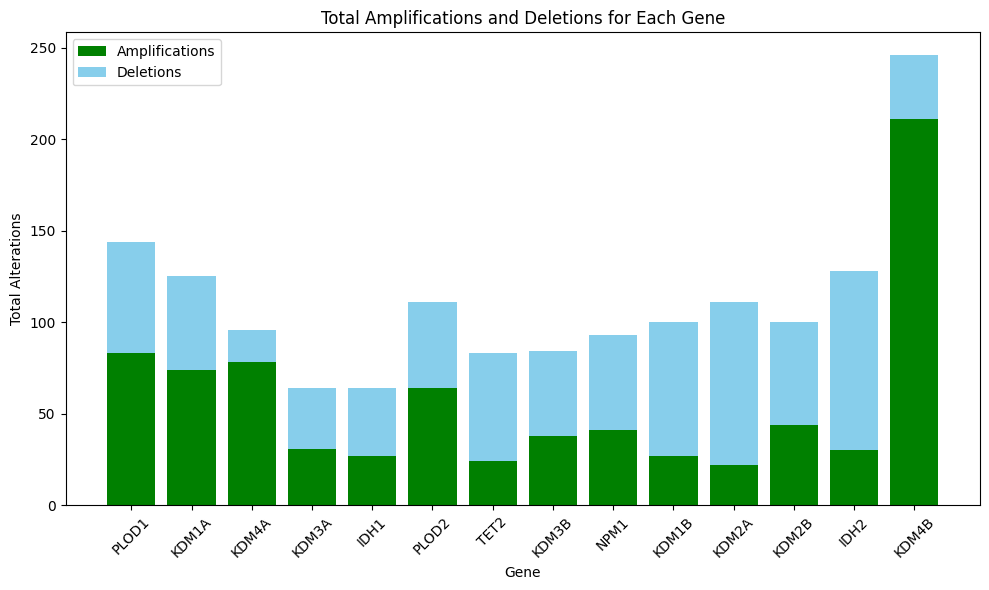

In [25]:
import matplotlib.pyplot as plt

# Plot the amplifications and deletions
plt.figure(figsize=(10, 6))
plt.bar(copy_number_filtered.index, copy_number_filtered['Total_Amplifications'], color='green', label='Amplifications')
plt.bar(copy_number_filtered.index, copy_number_filtered['Total_Deletions'], color='skyblue', label='Deletions', bottom=copy_number_filtered['Total_Amplifications'])
plt.xlabel('Gene')
plt.ylabel('Total Alterations')
plt.title('Total Amplifications and Deletions for Each Gene')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

B. How many patients have each gene mutated with either copy number alterations or point mutations?


In [6]:
# For copy number alterations

# get total alterations by using bool to sum up thw amount of non 0 values and make it a column
copy_number_filtered['Total_Alterations'] = copy_number_filtered.iloc[:, 2:-2].astype(bool).sum(axis=1)
# print the total alterations column
copy_number_filtered['Total_Alterations']

<ipython-input-6-b287bc453c85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_number_filtered['Total_Alterations'] = copy_number_filtered.iloc[:, 2:-2].astype(bool).sum(axis=1)


Hugo_Symbol
PLOD1    140
KDM1A    123
KDM4A     94
KDM3A     63
IDH1      63
PLOD2    107
TET2      82
KDM3B     83
NPM1      92
KDM1B     98
KDM2A    110
KDM2B     96
IDH2     127
KDM4B    240
Name: Total_Alterations, dtype: int64

C. For the top 3 most mutated genes:
how often is each gene mutated
are the mutations activating or inactivating?
Is the mutation pattern consistent with oncogene or tumor suppressor activity in cancer?


In [7]:
# create a list for the top 3 mutated genes
top_3_genes = ['KDM4B', 'PLOD1', 'IDH2']

In [8]:
# Calculate the mutation rate by dividing by the total number of tumors in the data
copy_number_filtered['Mutation_Rate'] = copy_number_filtered['Total_Alterations'] / 522


<ipython-input-8-4380cc4e1f88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_number_filtered['Mutation_Rate'] = copy_number_filtered['Total_Alterations'] / 522


In [9]:
copy_number_filtered

,Entrez_Gene_Id,Cytoband,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,...,TCGA-76-6192-01,TCGA-76-6193-01,TCGA-76-6282-01,TCGA-76-6285-01,TCGA-81-5910-01,TCGA-87-5896-01,Total_Amplifications,Total_Deletions,Total_Alterations,Mutation_Rate
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
PLOD1,5351.0,1p36.22,1,0,0,0,0,0,0,0,...,0,0,0,0,-1,2,83,61,140,0.268199
KDM1A,23028.0,1p36.12,1,0,0,0,0,0,0,2,...,0,0,0,0,-1,-1,74,51,123,0.235632
KDM4A,9682.0,1p34.1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,78,18,94,0.180077
KDM3A,55818.0,2p11.2,1,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,31,33,63,0.120690
IDH1,3417.0,2q34,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,27,37,63,0.120690
PLOD2,5352.0,3q24,1,0,-1,0,0,0,0,0,...,0,0,0,1,0,0,64,47,107,0.204981
TET2,54790.0,4q24,0,0,-1,0,0,-1,0,0,...,0,0,0,-1,0,0,24,59,82,0.157088
KDM3B,51780.0,5q31.2,0,0,0,0,0,-1,-1,0,...,0,0,0,0,0,0,38,46,83,0.159004
NPM1,4869.0,5q35.1,0,0,0,0,0,-1,-1,0,...,0,0,0,0,0,0,41,52,92,0.176245


In [10]:
# Filter for just the top 3 genes
copy_number_top_3 = copy_number_filtered[copy_number_filtered.index.isin(top_3_genes)]
# show the mutation rates
copy_number_top_3['Mutation_Rate']
# In KDM4B, most of the alterations were amplifications, so the mutations were mostly activating. Making KDM4B consistant with an oncogene
# In PL0D1, more of the alterations were amplifications again, but a lower overall percentage. This is still consistant with an oncogene because more of the mutations were activating
# In IDH2, more of the mutations were deletions, so mostly inactivating. This is consistant with mutation patterns of TSGs

Hugo_Symbol
PLOD1    0.268199
IDH2     0.243295
KDM4B    0.459770
Name: Mutation_Rate, dtype: float64

D. Which of your top 3 mutations is associated with increased or decreased survival outcome?



In [11]:
# Tranpose and fix the suffix so the data can be combined
clinical_data = clinical.transpose().add_suffix('-01')

# Combine the clinical and copy number data
copy_number_clinical_data = pd.concat([copy_number_top_3, clinical_data], axis=0)

# Filter by copy number alterations for each gene
PLOD1_filtered_df = copy_number_clinical_data.loc[:, (copy_number_clinical_data.loc['PLOD1'] != 0) & (~copy_number_clinical_data.loc['PLOD1'].isna())]
IDH2_filtered_df = copy_number_clinical_data.loc[:, (copy_number_clinical_data.loc['IDH2'] != 0) & (~copy_number_clinical_data.loc['IDH2'].isna())]
KDM4B_filtered_df = copy_number_clinical_data.loc[:, (copy_number_clinical_data.loc['KDM4B'] != 0) & (~copy_number_clinical_data.loc['KDM4B'].isna())]

# Get the mean survival months for patients with copy number changes for each gene
os_months_mean_PLOD1 = PLOD1_filtered_df.loc['OS_MONTHS'].mean()
os_months_mean_IDH2 = IDH2_filtered_df.loc['OS_MONTHS'].mean()
os_months_mean_KDM4B = KDM4B_filtered_df.loc['OS_MONTHS'].mean()

# Display the mean
print("Mean Survival Months of PLOD1 copy number alterations:", os_months_mean_PLOD1)
print("Mean Survival Months of IDH2 copy number alterations:", os_months_mean_IDH2)
print("Mean Survival Months of KDM4B copy number alterations:", os_months_mean_KDM4B)

Mean Survival Months of PLOD1 copy number alterations: 14.59214285714286
Mean Survival Months of IDH2 copy number alterations: 14.750393700787406
Mean Survival Months of KDM4B copy number alterations: 15.639166666666659


As we can see, copy number alterations in these genes all had a similar mean of survival months at about 15. This is a relativly low survival outcome meaning copy number alterations in these genes are associated with a low survival outcome

E. How often is the pathway mutated overall in this cancer (how many patients have one or more genes mutated)?


In [12]:
# find out how may patients have a mutation in at least 1 gene on the pathway
non_zero_columns_count = (copy_number_filtered.iloc[:, 3:-4] != 0).any().sum()
# divide that by the total amount of patients
pathway_mutation_rate = non_zero_columns_count/522

pathway_mutation_rate

0.814176245210728

## 4.

Gene expression analysis. Pick a gene (possibly the same gene) for each of the gene expression analyses below. For each of the two types of (epi)genomic changes listed below, make a figure to visualize the association of the (epi)genomic alteration and gene expression. Then, interpret your figure: this includes stating how the (epi)genomic alteration effects this gene and what we can conclude about which subjects have oncogenic changes to this gene.

A. Association of expression and methylation at the locus.


In [13]:
# Make a list of our gene of interest
gene_of_interest = ['IDH1']

In [14]:
!ls $data_dir

case_lists
data_clinical_patient.txt
data_clinical_sample.txt
data_cna_hg19.seg
data_cna.txt
data_linear_cna.txt
data_mrna_seq_v2_rsem.txt
data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt
data_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt
data_mutations.txt
data_rppa.txt
data_rppa_zscores.txt
LICENSE
meta_clinical_patient.txt
meta_clinical_sample.txt
meta_cna_hg19_seg.txt
meta_cna.txt
meta_linear_cna.txt
meta_mrna_seq_v2_rsem.txt
meta_mrna_seq_v2_rsem_zscores_ref_all_samples.txt
meta_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt
meta_mutations.txt
meta_rppa.txt
meta_rppa_zscores.txt
meta_study.txt


My Cohort does not cantain DNA methylation data. If I had DNA methylation data, I would isolate the methylation data at the promoter for IDH1. I would then concatinate the methylation data with the gene expression data

To Show the relationship, I would then create a scatterplot with the X axis being IDH1 methylation % and the Y axis being IDH1 expression. Each dot would be a different tumor. From this plot I would be able to tell if there is a relationship between the two variables.

B. Association of expression and copy number at the locus.


In [15]:
# Filter for the gene expression data for just IDH1
gene_expression_IDH1 = gene_expression[gene_expression.index.isin(gene_of_interest)]
gene_expression_IDH1.index = ['IDH1 Expression']
gene_expression_IDH1

,Entrez_Gene_Id,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0129-01,TCGA-06-0130-01,TCGA-06-0132-01,...,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4927-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01,TCGA-76-4932-01
IDH1 Expression,3417,3917.0,5282.0,6667.0,3740.0,5105.0,9847.0,5405.0,4829.0,5939.0,...,4011.0,3034.0,4110.0,8178.0,4064.0,6111.0,6281.0,4586.0,10399.0,8370.0


In [16]:
# Filter for the copy number alterations of IDH1
copy_number_IDH1 = copy_number[copy_number.index.isin(gene_of_interest)]
copy_number_IDH1.index = ['IDH1 Copy number']

copy_number_IDH1

,Entrez_Gene_Id,Cytoband,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,...,TCGA-76-4931-01,TCGA-76-4934-01,TCGA-76-4935-01,TCGA-76-6191-01,TCGA-76-6192-01,TCGA-76-6193-01,TCGA-76-6282-01,TCGA-76-6285-01,TCGA-81-5910-01,TCGA-87-5896-01
IDH1 Copy number,3417.0,2q34,1,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0


In [17]:
# Combine the dfs
combined = pd.concat([gene_expression_IDH1, copy_number_IDH1], axis=0)
# drop column where there is missing data
combined = combined.dropna(axis=1)

combined

#unique_values = combined.iloc[1, :].unique()
#unique_values

,Entrez_Gene_Id,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0129-01,TCGA-06-0130-01,TCGA-06-0132-01,...,TCGA-41-2571-01,TCGA-41-2572-01,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01
IDH1 Expression,3417.0,3917.0,5282.0,6667.0,3740.0,5105.0,9847.0,5405.0,4829.0,5939.0,...,3226.0,7293.0,4011.0,3034.0,4110.0,8178.0,4064.0,6281.0,4586.0,10399.0
IDH1 Copy number,3417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Get the average expression for each copy number value

import numpy as np

# Define the IDH1 Expression row
idh1_expression = combined.iloc[0]

# Define the IDH1 Copy number row
idh1_copy_number = combined.iloc[1]

# Filter IDH1 expression based on copy number values
expression_copy_0 = idh1_expression[idh1_copy_number == 0]
expression_copy_1 = idh1_expression[idh1_copy_number == 1]
expression_copy_neg_1 = idh1_expression[idh1_copy_number == -1]

# Calculate the average expression for each copy number category
avg_expression_copy_0 = np.mean(expression_copy_0)
avg_expression_copy_1 = np.mean(expression_copy_1)
avg_expression_copy_neg_1 = np.mean(expression_copy_neg_1)

# put it into a df
average_expression_df = pd.DataFrame({
    'Copy_Number': [0, 1, -1],
    'Average_Expression': [avg_expression_copy_0, avg_expression_copy_1, avg_expression_copy_neg_1]
})
average_expression_df

,Copy_Number,Average_Expression
0,0,5932.244275
1,1,4869.500000
2,-1,4491.333333


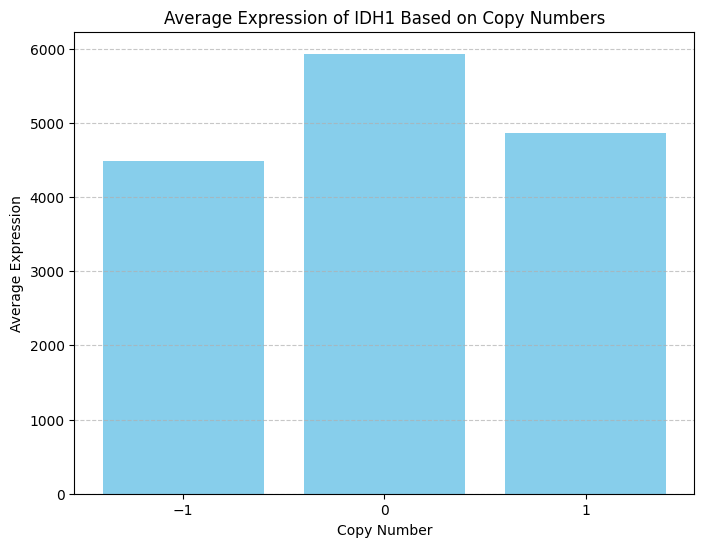

In [19]:
# Build a plot from the data

plt.figure(figsize=(8, 6))
plt.bar(average_expression_df['Copy_Number'], average_expression_df['Average_Expression'], color='skyblue')
plt.xlabel('Copy Number')
plt.ylabel('Average Expression')
plt.title('Average Expression of IDH1 Based on Copy Numbers')
plt.xticks(average_expression_df['Copy_Number'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The plot shows that there is not much of a difference in average expression between the deletions and amplifications while the no alteration bar shows greater gene expression

## 5.

Mutual exclusivity and co-occurrence analysis. Analyze your top 3 most mutated genes from above. Make a visualization that allows you to compare mutual exclusivity or co-occurrence for all pairs of any two of these mutations.

In [20]:
# define a command to count the alterations between two genes as co-occuring or mutually exclusive
def count_alterations(gene1, gene2):
    # Start the counts at zero
    co_occurrence = 0
    mutual_exclusive = 0

# Skip the first two columns which are not sample IDs
    for sample in copy_number_top_3.columns[2:]:
        alteration_gene1 = copy_number_top_3.loc[gene1, sample]
        alteration_gene2 = copy_number_top_3.loc[gene2, sample]

        # Check for co-occurring alterations
        if alteration_gene1 > 0 and alteration_gene2 > 0:
            co_occurrence += 1
        # Check for mutually exclusive alterations
        elif (alteration_gene1 != 0 and alteration_gene2 == 0) or (alteration_gene1 == 0 and alteration_gene2 != 0):
            mutual_exclusive += 1

    return co_occurrence, mutual_exclusive

gene1 = 'PLOD1'
gene2 = 'IDH2'
gene3 = 'KDM4B'

# Print the counts to show the data for each pair of genes
co_occurrence_count_12, mutual_exclusive_count_12 = count_alterations(gene1, gene2)
print(f"Co-occurring alterations between {gene1} and {gene2}: {co_occurrence_count_12}")
print(f"Mutually exclusive alterations between {gene1} and {gene2}: {mutual_exclusive_count_12}")

co_occurrence_count_13, mutual_exclusive_count_13 = count_alterations(gene1, gene3)
print(f"Co-occurring alterations between {gene1} and {gene3}: {co_occurrence_count_13}")
print(f"Mutually exclusive alterations between {gene1} and {gene3}: {mutual_exclusive_count_13}")

co_occurrence_count_23, mutual_exclusive_count_23 = count_alterations(gene2, gene3)
print(f"Co-occurring alterations between {gene2} and {gene3}: {co_occurrence_count_23}")
print(f"Mutually exclusive alterations between {gene2} and {gene3}: {mutual_exclusive_count_23}")


Co-occurring alterations between PLOD1 and IDH2: 14
Mutually exclusive alterations between PLOD1 and IDH2: 157
Co-occurring alterations between PLOD1 and KDM4B: 41
Mutually exclusive alterations between PLOD1 and KDM4B: 226
Co-occurring alterations between IDH2 and KDM4B: 17
Mutually exclusive alterations between IDH2 and KDM4B: 247


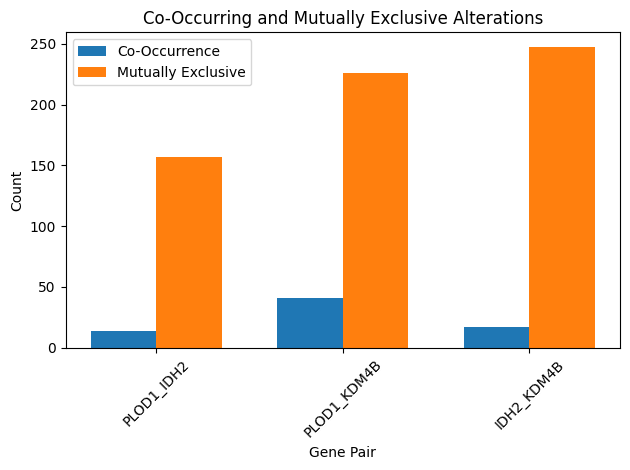

In [21]:
# Organize the data to be made into a df
gene_pairs = ['PLOD1_IDH2', 'PLOD1_KDM4B', 'IDH2_KDM4B']
co_occurrence_counts = [14, 41, 17]
mutual_exclusive_counts = [157, 226, 247]

# Create the df
data = {'Gene Pair': gene_pairs,
        'Co-Occurrence': co_occurrence_counts,
        'Mutually Exclusive': mutual_exclusive_counts}
co_occurrence_data = pd.DataFrame(data)


# Create a plot from the data
x = np.arange(len(gene_pairs))

# Set width of bars
bar_width = 0.35

# Plot
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, co_occurrence_counts, bar_width, label='Co-Occurrence')
bar2 = ax.bar(x + bar_width/2, mutual_exclusive_counts, bar_width, label='Mutually Exclusive')

# Add labels, title, and legend
ax.set_xlabel('Gene Pair')
ax.set_ylabel('Count')
ax.set_title('Co-Occurring and Mutually Exclusive Alterations')
ax.set_xticks(x)
ax.set_xticklabels(gene_pairs)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this visualization, we can see that most of the copy number alterations for all of these genes are mutually exclusive, while a small subset of the alterations are co-occurring

## 6.

Make one other plot to learn about the effect of this pathway on this cancer, using any of the data you have about the cancer cohort. Meaning, a different from the ones already required, using coding:


Form a hypothesis of something you expect to see in this cancer data. Describe what kind of plot you choose and how it will help assess your hypothesis. What do you expect to see?


I propose that missense mutations in the IDH1 gene will cause a change in the expression of IDH1

To visualize this, I will make a bar plot with two bars. One bar will be the average IDH1 gene expression in all samples, and the second bar will be the average IDH1 expression in IDH1 samples with a missense mutation. The Y axis will be gene expression.

I expect that the average expression of the mutant IDH1 will be either much greater or less than the expression of all samples IDH1 gene expression

Provide code to make the plot. The code must work and must be explained so someone else can understand how it works

In [22]:
# Make a df with mutation data for IDH1 mutations
gene = ['IDH1']
IDH1_mutations = mutations[mutations.index.isin(gene)]

# We will use the IDH1 gene expression df from befor
gene_expression_IDH1

# Remove the Entrez_Gene_Id column
gene_expression_IDH1 = gene_expression_IDH1.drop('Entrez_Gene_Id', axis=1)

#Using this df we will get a value for the IDH1 average expression
IDH1_ave_expression = gene_expression_IDH1.mean(axis = 1)

# Now we must get the average missense mutant expression
# To do this we need to combine mutation data with gene expression data
# First we will set the Index of the IDH1 mutation data to be the tumor IDs
IDH1_mutations = IDH1_mutations.set_index('Tumor_Sample_Barcode')

# Now we will concatinate them by similar IDs
concatenated_df = pd.concat([gene_expression_IDH1, IDH1_mutations.transpose()], axis=0)

# Now we must remove the columns where there is not an IDH1 mutation or where there is not IDH1 expression data
# Remove NaN
columns_to_drop = concatenated_df.columns[concatenated_df.loc['Entrez_Gene_Id'].isna()]
filt_df = concatenated_df.drop(columns=columns_to_drop)
columns_to_drop = filt_df.columns[filt_df.loc['IDH1 Expression'].isna()]
two_filt_df = filt_df.drop(columns=columns_to_drop)
# Now we have a filtered df with just mutated IDH1 data
two_filt_df


,TCGA-02-2483-01,TCGA-06-0129-01,TCGA-06-2570-01,TCGA-06-5417-01,TCGA-15-1444-01,TCGA-19-2629-01,TCGA-26-1442-01,TCGA-27-2521-01
IDH1 Expression,6667.0,5405.0,3700.0,1668.0,3448.0,3736.0,2816.0,3642.0
Entrez_Gene_Id,3417.0,3417.0,3417.0,3417.0,0.0,0.0,0.0,0.0
Center,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu
NCBI_Build,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37
Chromosome,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
uniprot_natural_variations,R -> G (in a glioma sample; glioblastoma multi...,R -> G (in a glioma sample; glioblastoma multi...,R -> G (in a glioma sample; glioblastoma multi...,R -> G (in a glioma sample; glioblastoma multi...,R -> G (in a glioma sample; glioblastoma multi...,R -> G (in a glioma sample; glioblastoma multi...,R -> G (in a glioma sample; glioblastoma multi...,R -> G (in a glioma sample; glioblastoma multi...
uniprot_region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uniprot_site,Substrate.,Substrate.,Substrate.,Substrate.,Substrate.,Substrate.,Substrate.,Substrate.
validation_alt_allele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Now we can get the average mutant expression
IDH1_mutant_ave_expression = two_filt_df.loc['IDH1 Expression'].mean()

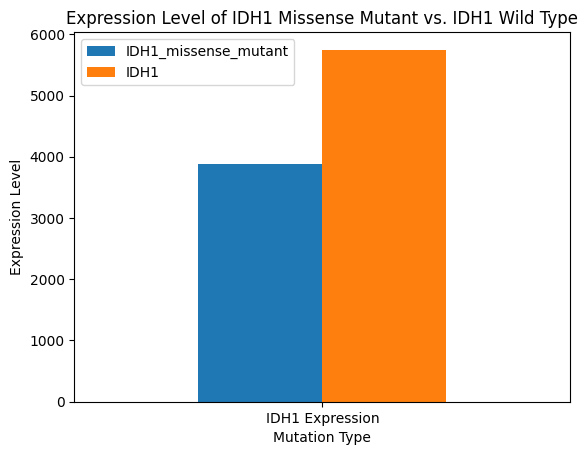

In [24]:
# Now that we have the expression values, we can create a dataframe
expression_data = pd.DataFrame({'IDH1_missense_mutant': [3885.25],
                                'IDH1': [5748.125]})
# Format the Index to be IDH1 Expression
expression_data = expression_data.rename_axis('IDH1 Expression')
expression_data.index = ['IDH1 Expression']

#Now create a bar plot
expression_data.plot.bar(rot=0)

# Add labels and title
plt.xlabel('Mutation Type')
plt.ylabel('Expression Level')
plt.title('Expression Level of IDH1 Missense Mutant vs. IDH1 Wild Type')

# Display the plot
plt.show()

Interpret the plot: how does the plot allow you to assess your hypothesis? What do you conclude by looking at this.

By looking at this plot we can assess if missense mutations cause a change in IDH1 gene expression. From this plot, we can see that IDH1 expression on average was lower in IDH1 mutants than all tumor IDH1.

## 7.

Find one other research article related to this type of cancer that refers to either: the activity of this pathway; or the genes/mutations in the pathway; or a drug and how it can impact that pathway in that cancer.




https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2820389/

Describe the:

knowledge gap

The knowledge gap this study was trying to fill was identifying genes alterations that were previously not known to contribute to Glioblastoma

hypothesis

The hypothesis is that by looking at mutation, expression, and copynumber data, analysis could be run to find previously unknown genes that are involved in Glioblastoma.

experimental design of the paper (what are the observations and how many observations; and what are the variables and approximately how many)

This experiment had 22 observations which were 22 different GBM tumor samples

sequence data was obtained for 20,661 tumor samples. For each gene, gene expression data as well as copy number data was obtained

Summarize how the findings in the article relates to your findings above about the pathway.


This study found a recurrent mutation in the IDH1 gene. The mutation occured in 12% of the GBM patients. In my study, I found a recurrence of mutations in IDH1 as well. The recurrent IDH1 mutations in my study were all missense mutations

Include the two most relevant figures from the paper. For each figure:

explain what are the axes (horizontal and vertical)

what the points, bars, colors mean (depending on the plot. Please see me if you are not sure which parts to explain)

Copy over one sentence (quote the sentence) showing a conclusions they made based on this figure


## First Figure

*** I am having trouble getting the image into my notebook, but this is in reference to figure 2 in the paper ***

This figure is showing the overall suvival rate for IDH1 mutants and IDH1 wildtype. The Y axis shows overall survival percentage while the X axis shows years. The black line shows IDH1 wildtype while the red line shows IDH1 mutants. By looking at the figure, we can see that IDH1 mutants have a significantly longer survival average.


"patients with IDH1 mutations had a significantly improved prognosis, with a median overall survival of 3.8 years as compared to 1.1 years for patients with wild-type IDH1"

## Second Figure

There are only two figures in this paper, so the second figure I will talk about is figure 1. Figure 1 shows the structure of the active site of the IDH1 protein. NADP, which binds to IDH1 is colored orange. Isocitrate, which aloso binds to IDH1, is colored purple. This figure shows the complex structure of IDH1, shows how manipulations to the amino acid sequence can cause issues with it carrying out its normal function.

"The R132 residue is conserved in all known species and is localized to the substrate binding site, where it forms hydrophilic interactions with the alpha-carboxylate of isocitrate (Fig. 1)"